# Tutorial: Density estimation via Binless Multidimensional Integration

This tutorial showcases the performance of the BMTI method for density estimation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dadapy import DensityAdvanced

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Load a 6 dimensional dataset from the dataset folder
X = np.genfromtxt('datasets/6d_double_well.txt')
true_log_den = np.genfromtxt('datasets/6d_double_well_logdensities_and_grads.txt')[:, 0]

# Subsample the dataset for a faster run
every = 1
X = X[::every]
true_log_den = true_log_den[::every]

print(X.shape)

(12000, 6)


In [3]:
d = DensityAdvanced(X, maxk=1000, verbose=True)

# copute the density using the kNN method  
d.compute_density_kNN(k=10)
log_den_kNN = d.log_den

# Compute the density using the kstarNN method
d.compute_density_kstarNN()
log_den_kstarNN = d.log_den 

# Compute the density using the BMTI method
d.compute_density_BMTI()
log_den_BMTI = d.log_den

Computation of distances started
Computation of the distances up to 1000 NNs started
1.06 seconds for computing distances
ID estimation finished: selecting ID of 5.959074886953922
k-NN density estimation started (k=10)
k-NN density estimation finished
kstar estimation started, Dthr = 23.92812698
0.06 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished
Computation of the neighbour indices started
0.00 seconds computing neighbour indices
Computation of the vector differences started
0.00 seconds computing vector differences
Estimation of the density gradient started
0.02 seconds computing gradients
Estimation of the gradient semisum (linear) corrections deltaFij to the log-density started
Computation of the numbers of common neighbours started
5.19 seconds to carry out the computation.
Estimation of the pearson correlation coefficient started
0.01 seconds to carry out the estimation.
5.28 seconds computing gradient corrections
BMTI density estimat

In [4]:
# remove the mean to both the true and estimated density 
true_log_den = true_log_den - np.mean(true_log_den)
log_den_kNN = log_den_kNN - np.mean(log_den_kNN)
log_den_kstarNN = log_den_kstarNN - np.mean(log_den_kstarNN)
log_den_BMTI = log_den_BMTI - np.mean(log_den_BMTI)


In [5]:
# compute MSE errors
MSE_kNN = np.mean((log_den_kNN - true_log_den)**2)
MSE_kstarNN = np.mean((log_den_kstarNN - true_log_den)**2)
MSE_BMTI = np.mean((log_den_BMTI - true_log_den)**2)

print('MSE kNN: ', MSE_kNN)
print('MSE kstarNN: ', MSE_kstarNN)
print('MSE BMTI: ', MSE_BMTI)


MSE kNN:  0.263857165379375
MSE kstarNN:  0.2231982685435669
MSE BMTI:  0.14574151601966434


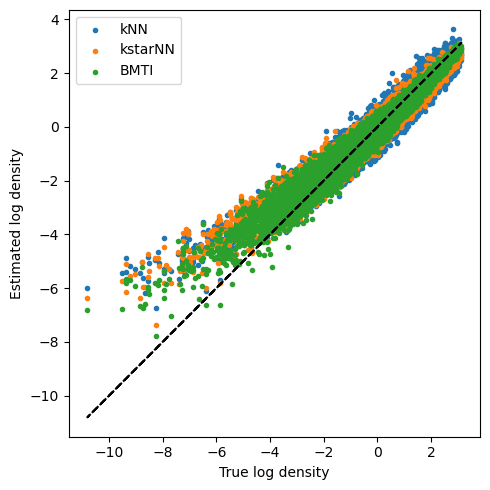

In [6]:
# plot real density vs estimated density
plt.figure(figsize=(5, 5))
plt.scatter(true_log_den, log_den_kNN, marker= '.', label='kNN')
plt.scatter(true_log_den, log_den_kstarNN,marker= '.', label='kstarNN')
plt.scatter(true_log_den, log_den_BMTI, marker= '.', label='BMTI',)
plt.plot(true_log_den, true_log_den, 'k--')
plt.xlabel('True log density')
plt.ylabel('Estimated log density')
plt.legend()
plt.tight_layout()
